In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read time series data from file
file_path = "timestamps.txt"  # Replace this with the path to your file
with open(file_path, "r") as file:
    time_series_data = file.read()

# Parse the time series data
time_points = []
for line in time_series_data.split('\n'):
    if line.strip():
        time_points.append(float(line.split()[0]))

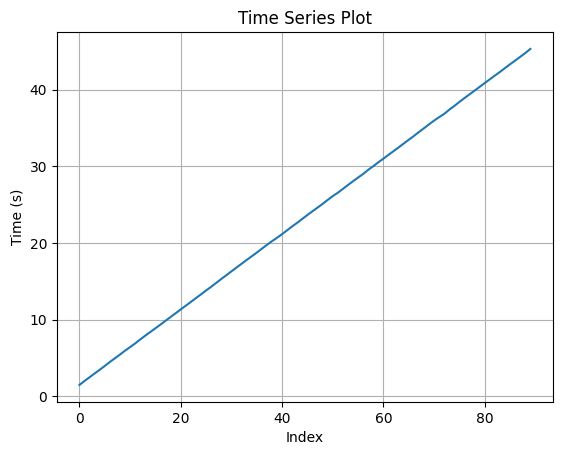

In [3]:
# Create x and y data
x = np.arange(len(time_points))
y = np.array(time_points)

# Plot the time series
plt.plot(x, y)
plt.xlabel('Index')
plt.ylabel('Time (s)')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

In [4]:
# Calculate time difference for 122 bpm
bpm = 122
seconds_per_beat = 60 / bpm
num_beats = len(time_points)

baseline_time_points = [seconds_per_beat] * (num_beats)
print(len(baseline_time_points))

90


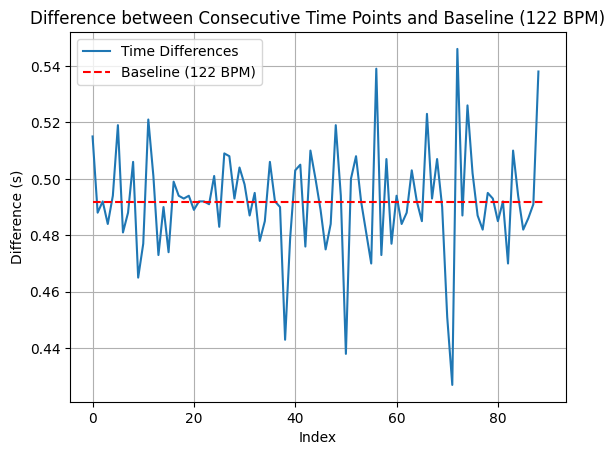

In [5]:
# Calculate differences between consecutive time points
differences = np.diff(time_points)

# Plot the differences and the baseline
plt.plot(np.arange(len(differences)), differences, label='Time Differences')
plt.plot(np.arange(num_beats), baseline_time_points, 'r--', label='Baseline (122 BPM)')
plt.xlabel('Index')
plt.ylabel('Difference (s)')
plt.title('Difference between Consecutive Time Points and Baseline (122 BPM)')
plt.legend()
plt.grid(True)
plt.show()

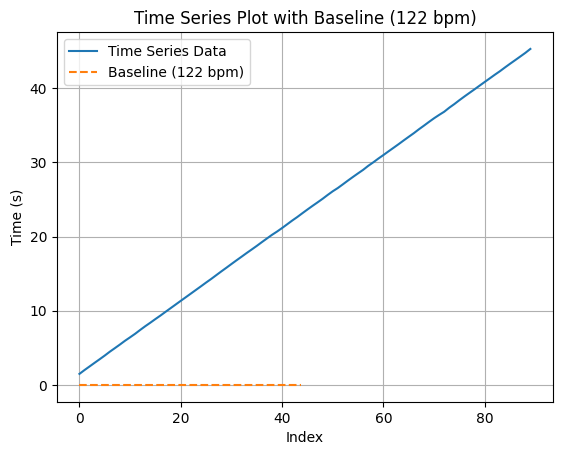

In [6]:
# Calculate time difference for 122 bpm
bpm = 122
seconds_per_beat = 60 / bpm

# Generate baseline time series
baseline_time_series = np.arange(0, len(time_points) * seconds_per_beat, seconds_per_beat)

# Plot the time series data and baseline
plt.plot(x, y, label='Time Series Data')
plt.plot(baseline_time_series, np.zeros_like(baseline_time_series), label='Baseline (122 bpm)', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Time (s)')
plt.title('Time Series Plot with Baseline (122 bpm)')
plt.legend()
plt.grid(True)
plt.show()